### Naive Bayes Classifier

 - Naive Bayes algorithm has `naive` assumption of independence between each pair of features and these features conform to Gaussian distribution.

$$P(X|C_{1}) = P(x_{1}|C_{1})\times\ P(x_{2}|C_{1})\times\ P(x_{3}|C_{1}) ... \times\ P(x_{n}|C_{1}) = \prod_{i = 1}^{n}P(x_{i}|C_{1})$$

 #### Use pima-indians.data file as our demonstration dataset.([download from here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)).
 
 #### Data Description
 
 1. Number of times pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)
 9. Class variable (0 or 1)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [9]:
var_names = ["Pregnant", "Plg", "BP", "TSFT", "SI", "BMI", "DP","Age", "Class"]

dat = list()
with open(file = 'data\\Pima_indians.txt', mode = 'r+') as readfile:
    for row in readfile:
        dat.append(list(map(lambda x: float(x), row.split(sep = ","))))

In [14]:
df = pd.DataFrame(data = dat, columns = var_names)
df.head(3)

,Pregnant,Plg,BP,TSFT,SI,BMI,DP,Age,Class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


In [27]:
x = df.drop(columns = ['Class']).as_matrix()
y = df['Class'].values

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Naive Bayes Classifier 
### [參數說明](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):

   - prior 輸入Y的先驗機率(Prior Probability)，若無輸入，將計算training set中 Y 各類別的先驗機率

In [35]:
from sklearn.naive_bayes import GaussianNB

In [154]:
NB = GaussianNB(priors = None)
NB.fit(X = x_train, y = y_train)

GaussianNB(priors=None)

### Visualize Counting Number of each Class

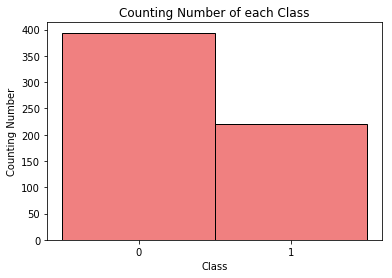

In [155]:
plt.figure()
plt.bar(x = range(len(NB.class_prior_)), height = NB.class_count_, color = 'lightcoral', width = 1, 
        align = 'center', edgecolor = 'k')
plt.xticks(NB.classes_)
plt.xlabel(s = 'Class')
plt.ylabel(s = 'Counting Number')
plt.title("Counting Number of each Class")
plt.show()

### Visualize Prior Probability of each Class

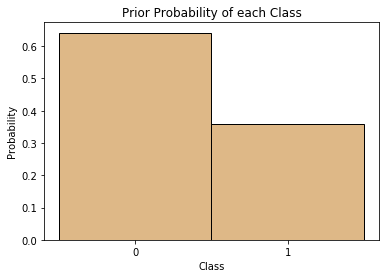

In [156]:
plt.figure()
plt.bar(x = range(len(NB.class_prior_)), height = NB.class_prior_, color = 'burlywood', width = 1, 
        align = 'center', edgecolor = 'k')
plt.xticks(NB.classes_)
plt.xlabel(s = 'Class')
plt.ylabel(s = 'Probability')
plt.title("Prior Probability of each Class")
plt.show()

In [157]:
prediction = NB.predict(X = x_test)
pred_prob = NB.predict_proba(X = x_test)
print("-"*10 + "predict Output Class: " + "-"*10)
print(prediction[:5])

print("\n")
print("-"*10 + "Predict Output Probability of each Class: "+ "-"*10)
print(pred_prob[:5])

----------predict Output Class: ----------
[0. 0. 0. 0. 0.]


----------Predict Output Probability of each Class: ----------
[[0.97207372 0.02792628]
 [0.99155578 0.00844422]
 [0.8579027  0.1420973 ]
 [0.91720459 0.08279541]
 [0.82210282 0.17789718]]


In [40]:
from sklearn import metrics 

In [158]:
#print("Accuracy: {0:.3f}%".format(NB.score(X = x_test, y = y_test)*100)) # the same as `metrics.accuracy_score`
print("Accuracy: {0:.3f}%".format(metrics.accuracy_score(y_true = y_test, y_pred = prediction)*100))

Accuracy: 74.675%


In [159]:
print(metrics.classification_report(y_true = y_test, y_pred = prediction))

             precision    recall  f1-score   support

        0.0       0.83      0.79      0.81       106
        1.0       0.58      0.65      0.61        48

avg / total       0.75      0.75      0.75       154



### Visualize Confusion Matrix (by [Skit-Learning Official Websit](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html))

In [160]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[84 22]
 [17 31]]


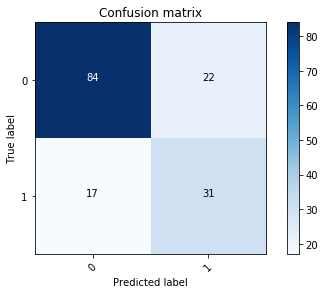

In [161]:
confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = prediction)

plot_confusion_matrix(cm = confusion_matrix, classes = ['0', '1'], cmap = plt.cm.Blues)

### Visualize Decision Boundary (by [mlxtend](https://rasbt.github.io/mlxtend/))

In [215]:
from mlxtend.plotting import plot_decision_regions

In [352]:
x = df[['BMI', "Age"]]
y = df['Class'].values

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [358]:
x_train = x_train.as_matrix()
y_train = y_train.astype(np.int64)

In [359]:
NB = GaussianNB()
NB.fit(X = x_train, y = y_train)

GaussianNB(priors=None)

In [360]:
print("Accuracy: {0:.3f} %".format(NB.score(X = x_test, y= y_test)*100))

Accuracy: 72.078 %


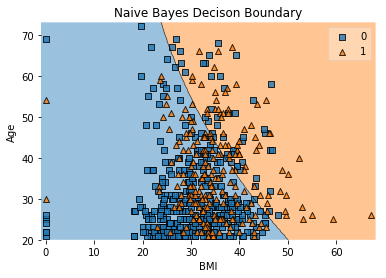

In [361]:
plot_decision_regions(X = x_train, y = y_train, clf = NB, legend = 1)
plt.title(s = "Naive Bayes Decison Boundary")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

### Visualize Decision Boundary  by matplotlib

In [373]:
xmin, xmax = x['BMI'].min(), x['BMI'].max()
ymin, ymax = x['Age'].min(), x['Age'].max()

xx, yy = np.meshgrid(np.linspace(start = xmin - 1, stop = xmax + 1), np.linspace(start = ymin - 1, stop = ymax + 1))
pair_data = np.c_[xx.ravel(), yy.ravel()]
zz = NB.predict(X = pair_data)

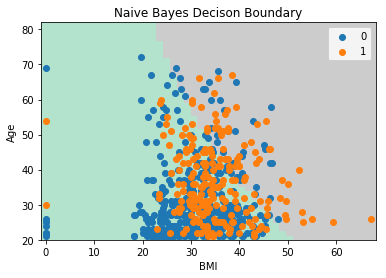

In [376]:
zz = zz.reshape(xx.shape)
#plt.contourf(xx, yy, zz, alpha = 0.75, cmap = plt.cm.Pastel2)
#plt.contour(xx, yy, zz, linewidths = 0.5, colors = 'black')

plt.pcolormesh(xx, yy, zz, cmap = plt.cm.Pastel2)

for class_label in set(y_train):
    plt.scatter(x = x_train[y_train == class_label, 0], y = x_train[y_train == class_label, 1], label = class_label)

plt.title("Naive Bayes Decison Boundary")
plt.xlabel("BMI")
plt.ylabel('Age')
plt.legend()
plt.show()